In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv('Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
print(data.isnull().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


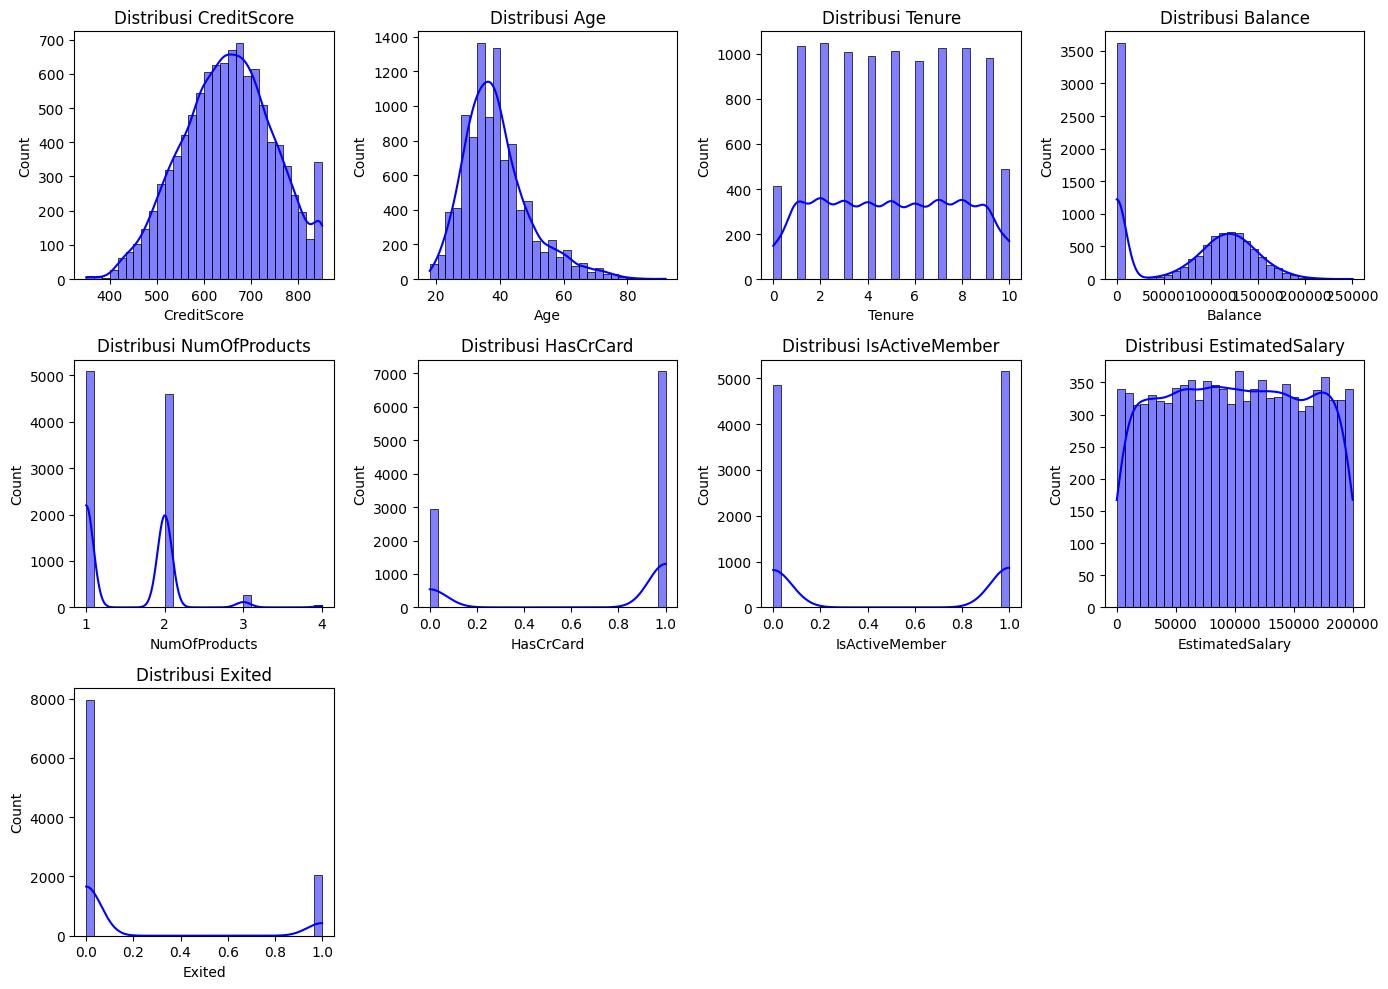

In [7]:
num_features = data.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

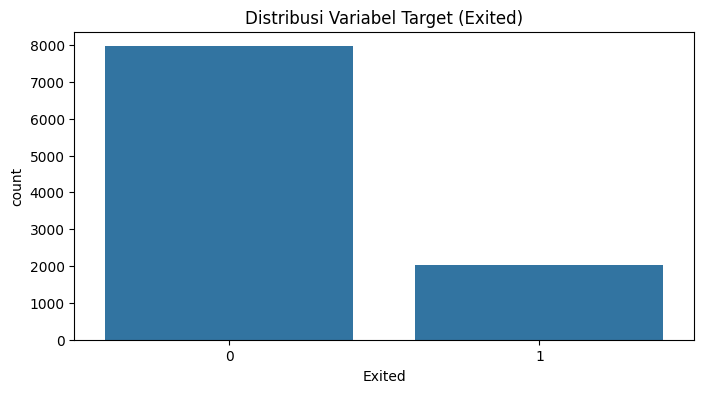

In [8]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Exited', data=data)
plt.title('Distribusi Variabel Target (Exited)')
plt.show()

In [9]:
data_majority = data[data['Exited'] == 0.0]
data_minority = data[data['Exited'] == 1.0]

data_majority_downsampled = data_majority.sample(n=len(data_minority), random_state=42)

data_balanced = pd.concat([data_majority_downsampled, data_minority], axis=0)

data_new = data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(data_new['Exited'].value_counts())

Exited
0    2037
1    2037
Name: count, dtype: int64


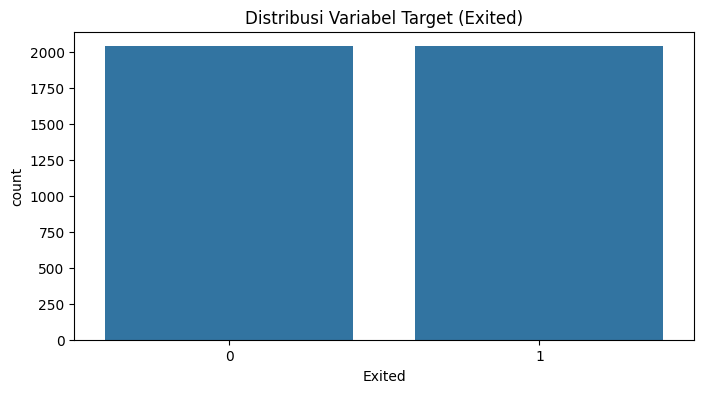

In [10]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Exited', data=data_new)
plt.title('Distribusi Variabel Target (Exited)')
plt.show()

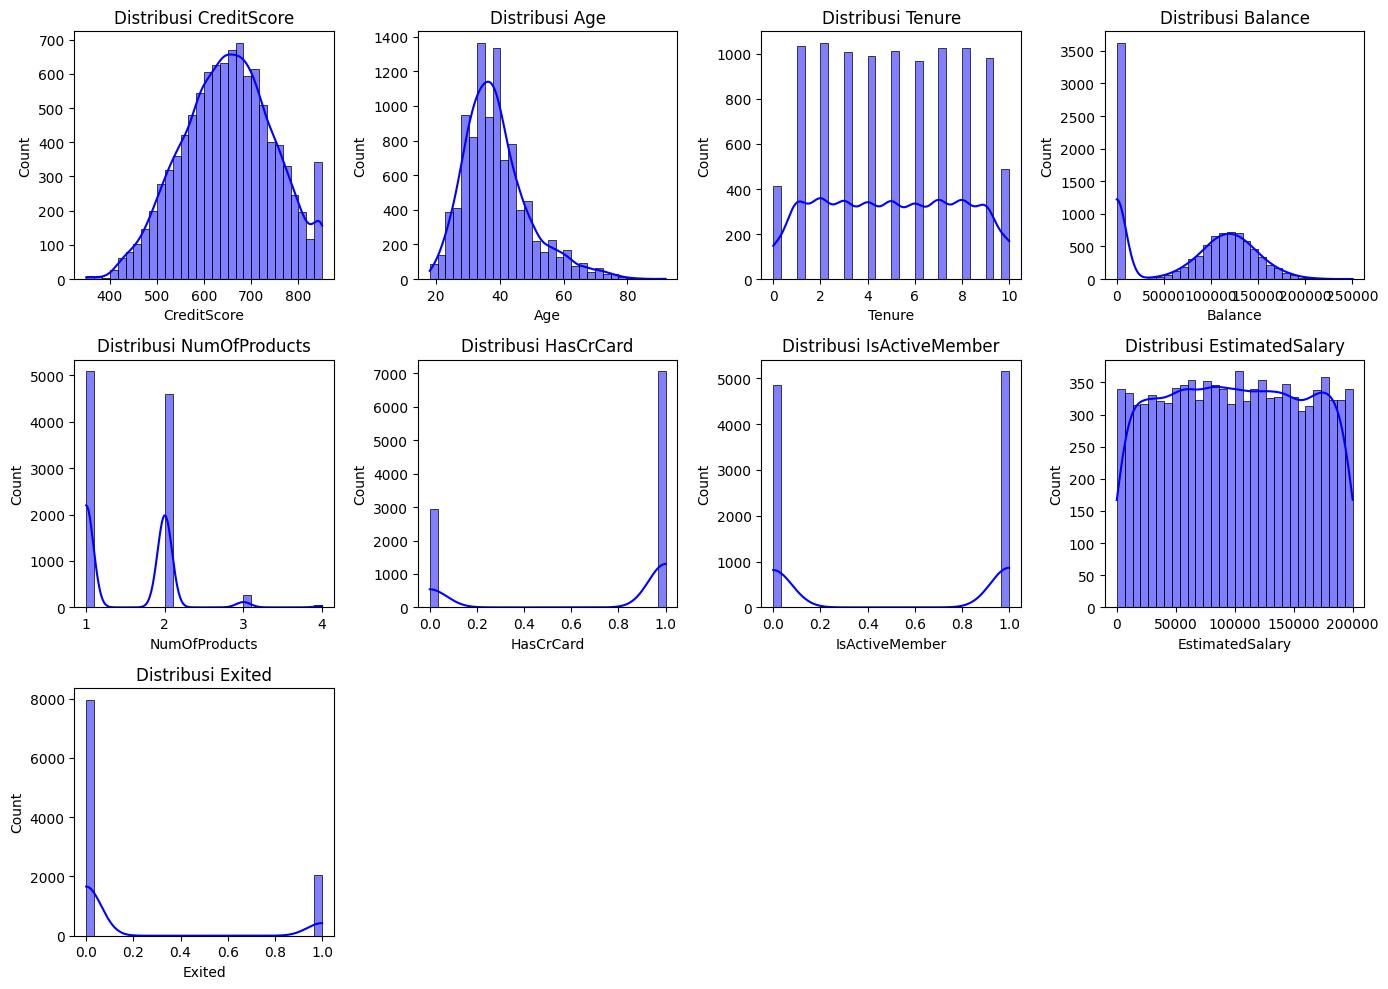

In [11]:
num_features = data_new.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

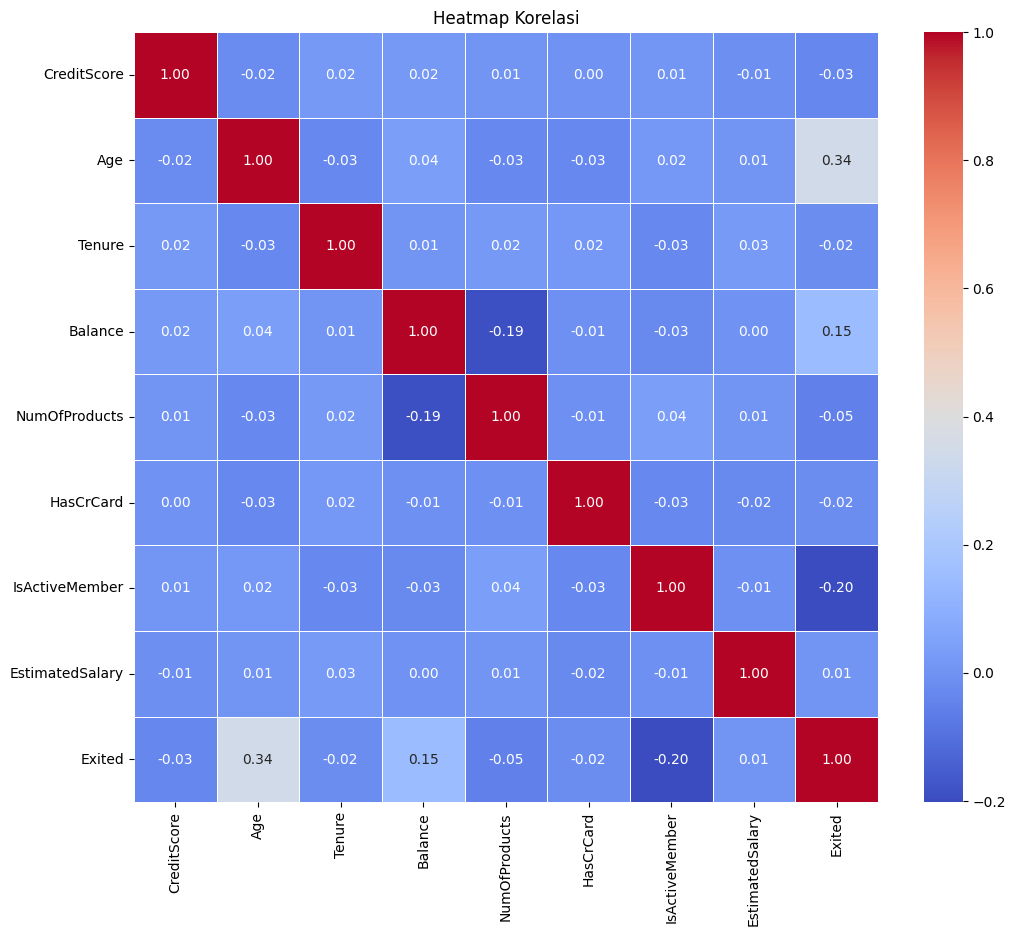

In [12]:
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

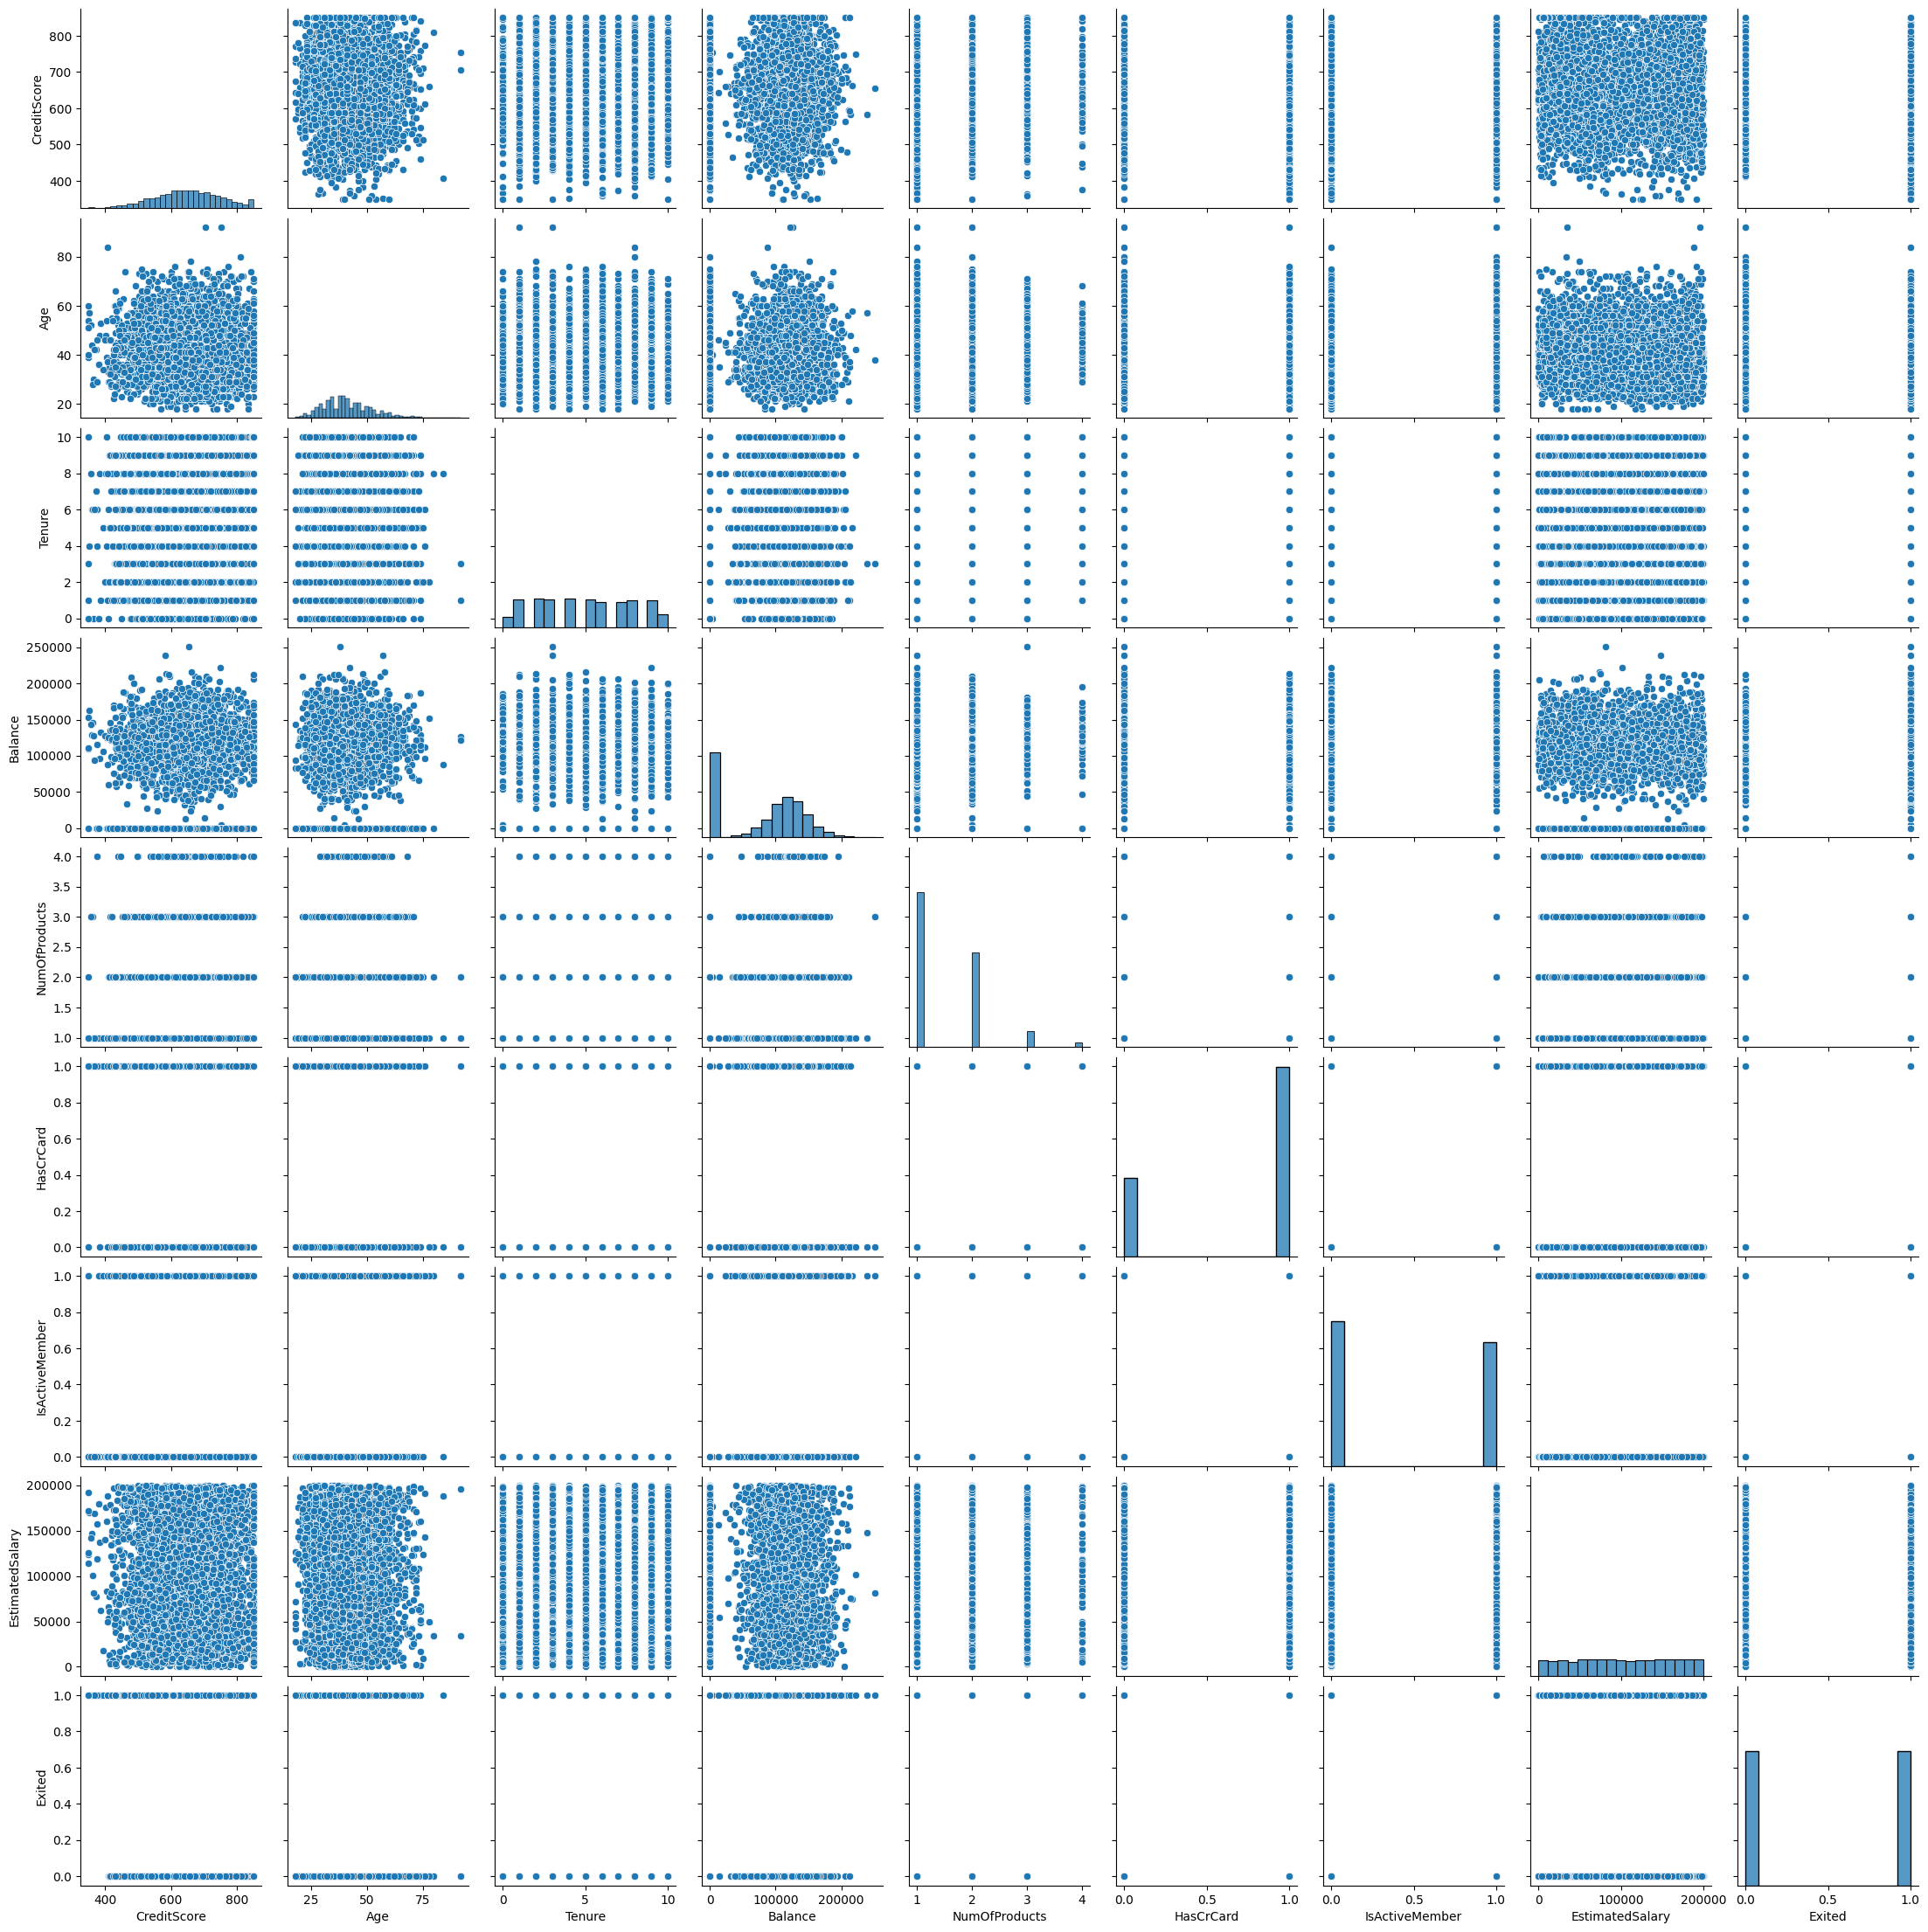

In [13]:
sns.pairplot(num_features)
plt.show()

In [14]:
print(data_new['Geography'].unique())

['Germany' 'France' 'Spain']


In [15]:
print(data_new['Gender'].unique())

['Female' 'Male']


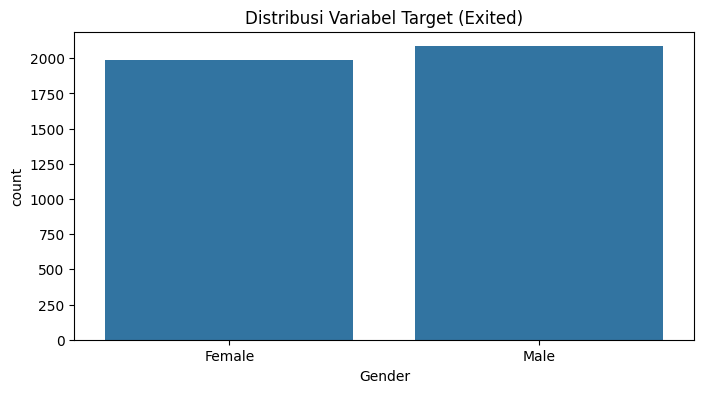

In [16]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Gender', data=data_new)
plt.title('Distribusi Variabel Target (Exited)')
plt.show()

In [17]:
# Map ke angka
data_new['Gender'] = data_new['Gender'].map({'Female': 0, 'Male': 1})


# # Geography one hot encoding lengkap (tanpa drop_first)
data_encoded = pd.get_dummies(data_new, columns=['Geography'], drop_first=False)

print(data_encoded.head())
print(data_encoded.columns)

   CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          655       0   72       5  138089.97              2          1   
1          777       0   32       2       0.00              1          1   
2          632       0   38       6   86569.76              2          1   
3          662       1   34       2  117731.79              2          0   
4          678       0   28       4       0.00              2          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1         99920.41       0             False   
1               0        136458.19       1              True   
2               0         98090.91       0             False   
3               1         55120.79       0              True   
4               1        144423.17       1              True   

   Geography_Germany  Geography_Spain  
0               True            False  
1              False            False  
2               True            False 

In [18]:
data_encoded.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,655,0,72,5,138089.97,2,1,1,99920.41,0,False,True,False
1,777,0,32,2,0.00,1,1,0,136458.19,1,True,False,False
2,632,0,38,6,86569.76,2,1,0,98090.91,0,False,True,False
3,662,1,34,2,117731.79,2,0,1,55120.79,0,True,False,False
4,678,0,28,4,0.00,2,1,1,144423.17,1,True,False,False


In [19]:
data_encoded_drop = data_encoded.drop(columns=['NumOfProducts'])

In [20]:
scaler = MinMaxScaler()
 
numeric_columns = data_encoded.select_dtypes(include=['int64', 'float64']).columns
data_encoded[numeric_columns] = scaler.fit_transform(data_encoded[numeric_columns])
 
X = data_encoded.drop(columns=['Exited'])
y = data_encoded['Exited']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(3259, 12), y_train=(3259,)
Test set shape: X_test=(815, 12), y_test=(815,)


In [21]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2,3,4, 5, 10, 11],
    'min_samples_leaf': [1, 2, 5],
    'class_weight': [None, 'balanced']
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,
    cv=3,
    scoring='roc_auc', 
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rf_random.fit(X_train, y_train)
print("Best params:", rf_random.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best params: {'n_estimators': 500, 'min_samples_split': 11, 'min_samples_leaf': 1, 'max_depth': 10, 'class_weight': None}


In [22]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=10,
    min_samples_split=11,
    min_samples_leaf=4,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

# 5-Fold Cross Validation pakai ROC-AUC
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring="roc_auc", n_jobs=-1)
print("ROC-AUC per fold:", scores)
print("Mean ROC-AUC:", scores.mean())
print("Std ROC-AUC:", scores.std())

rf.fit(X_train, y_train)
print("Model training selesai.")

ROC-AUC per fold: [0.828765   0.8706199  0.84931687 0.87139147 0.87714016]
Mean ROC-AUC: 0.8594466793204564
Std ROC-AUC: 0.018025297354249438
Model training selesai.


In [23]:
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob))

Accuracy: 0.7705521472392638

Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.80      0.78       406
         1.0       0.79      0.75      0.77       409

    accuracy                           0.77       815
   macro avg       0.77      0.77      0.77       815
weighted avg       0.77      0.77      0.77       815


Confusion Matrix:
 [[323  83]
 [104 305]]

ROC-AUC Score: 0.8649656135955773


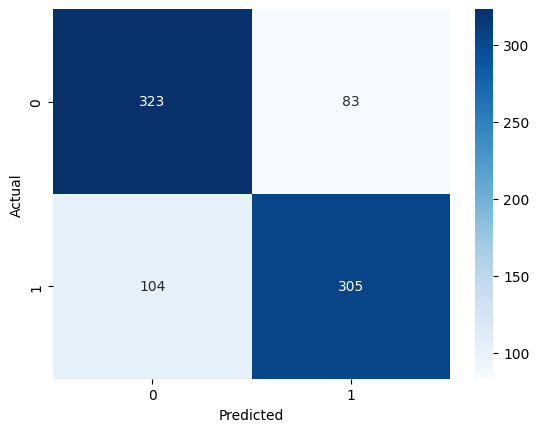

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()